In [ ]:
# Install imbalanced-learn for handling imbalanced datasets
!pip install imbalanced-learn
!pip install ipywidgets

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Balancing the dataset
from imblearn.over_sampling import SMOTE

# PyTorch for neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Widgets for interactive inputs
import ipywidgets as widgets
from IPython.display import display

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# paths for data
train_data_path = '/content/drive/My Drive/dataEaex3CNN/fashion-mnist_train.csv'
test_data_path = '/content/drive/My Drive/dataEaex3CNN/fashion-mnist_test.csv'

# local copy (optional)
!cp "/content/drive/My Drive/dataEaex3CNN/fashion-mnist_train.csv" /content/
!cp "/content/drive/My Drive/dataEaex3CNN/fashion-mnist_test.csv" /content/
train_data_path = '/content/fashion-mnist_train.csv'
test_data_path = '/content/fashion-mnist_test.csv'


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Separating Labels and Pixels in the Training File
train_labels = train_data['label'].values
train_pixels = train_data.iloc[:, 1:].values

# Separating labels and images in the test file
test_labels = test_data['label'].values
test_pixels = test_data.iloc[:, 1:].values

class FashionMNISTDataset(Dataset):
    def __init__(self, pixels, labels, transform=None):
        self.pixels = pixels.reshape(-1, 28, 28).astype(np.float32)
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.pixels)

    def __getitem__(self, idx):
        image = self.pixels[idx]
        label = self.labels[idx]
        image = torch.FloatTensor(image).unsqueeze(0)  # # Add channel (grayscale)
        if self.transform:
            image = self.transform(image)
        return image, label

# Transformations: Normalization and data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Creating a DataLoader for training and testing
train_dataset = FashionMNISTDataset(train_pixels, train_labels, transform=transform)
test_dataset = FashionMNISTDataset(test_pixels, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

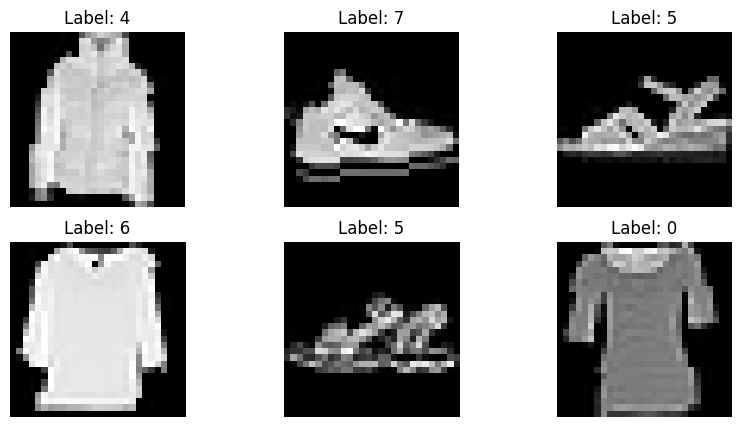

In [ ]:
# Checking samples from the data
examples = iter(train_loader)
example_data, example_labels = next(examples)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f'Label: {example_labels[i].item()}')
    plt.axis('off')
plt.show()

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Building a CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Creating the model
model = CNNModel()
print(model)

CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Parameters and optimization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Model training
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training Completed!")

Epoch [1/10], Loss: 0.7883
Epoch [2/10], Loss: 0.5067
Epoch [3/10], Loss: 0.4704
Epoch [4/10], Loss: 0.4409
Epoch [5/10], Loss: 0.4270
Epoch [6/10], Loss: 0.4040
Epoch [7/10], Loss: 0.3897
Epoch [8/10], Loss: 0.3737
Epoch [9/10], Loss: 0.3648
Epoch [10/10], Loss: 0.3646
Training Completed!


בדיקה


Accuracy on test set: 89.17%


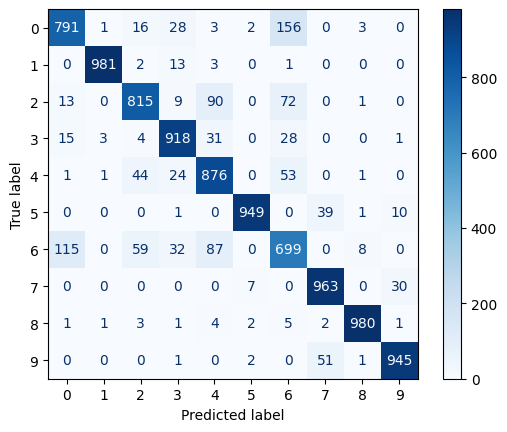

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Model evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Model accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.show()

In [ ]:
# Model improvement: New model with additional layers and improvements
class ImprovedCNNModel(nn.Module):
    def __init__(self):
        super(ImprovedCNNModel, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),  # Batch Normalization
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # new layer
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2)  # another pooling layer
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256),  # make bigger fully connected layer
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),  # add another layer
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

#  create new model
improved_model = ImprovedCNNModel()
print(improved_model)

ImprovedCNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1152, out_features=256, bias=True)
    (2): ReLU()
    (3

In [ ]:
# Parameters and optimization
improved_criterion = nn.CrossEntropyLoss()
improved_optimizer = optim.Adam(improved_model.parameters(), lr=0.0005)  # קצב למידה קטן יותר
improved_model.to(device)

# Training loop for the improved model
improved_num_epochs = 15  # More avenues for in-depth training
train_losses = []
val_accuracies = []

for epoch in range(improved_num_epochs):
    improved_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        improved_optimizer.zero_grad()
        outputs = improved_model(images)
        loss = improved_criterion(outputs, labels)
        loss.backward()
        improved_optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch [{epoch+1}/{improved_num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Improved Model Training Completed!")

Epoch [1/15], Loss: 0.4843
Epoch [2/15], Loss: 0.3328
Epoch [3/15], Loss: 0.2958
Epoch [4/15], Loss: 0.2732
Epoch [5/15], Loss: 0.2572
Epoch [6/15], Loss: 0.2455
Epoch [7/15], Loss: 0.2362
Epoch [8/15], Loss: 0.2257
Epoch [9/15], Loss: 0.2193
Epoch [10/15], Loss: 0.2116
Epoch [11/15], Loss: 0.2079
Epoch [12/15], Loss: 0.2035
Epoch [13/15], Loss: 0.1992
Epoch [14/15], Loss: 0.1918
Epoch [15/15], Loss: 0.1868
Improved Model Training Completed!


בדיקה

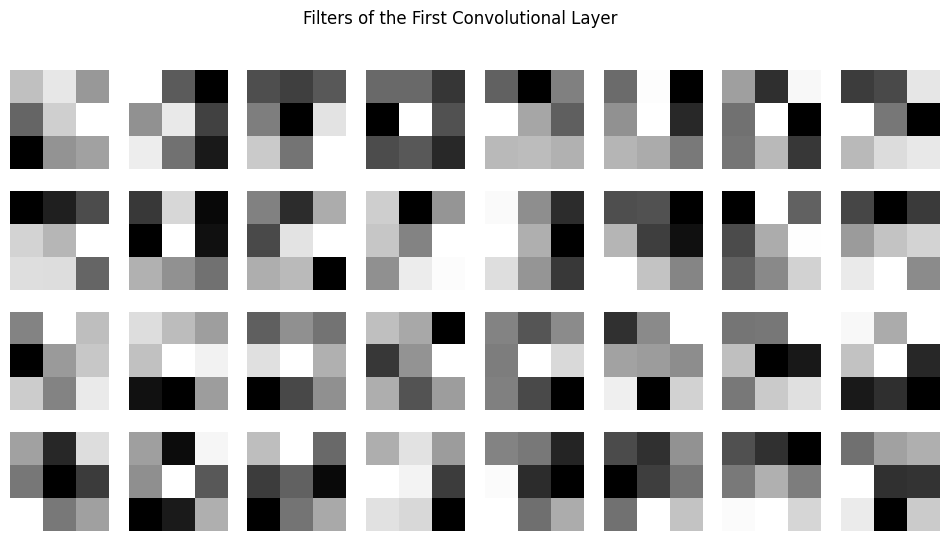

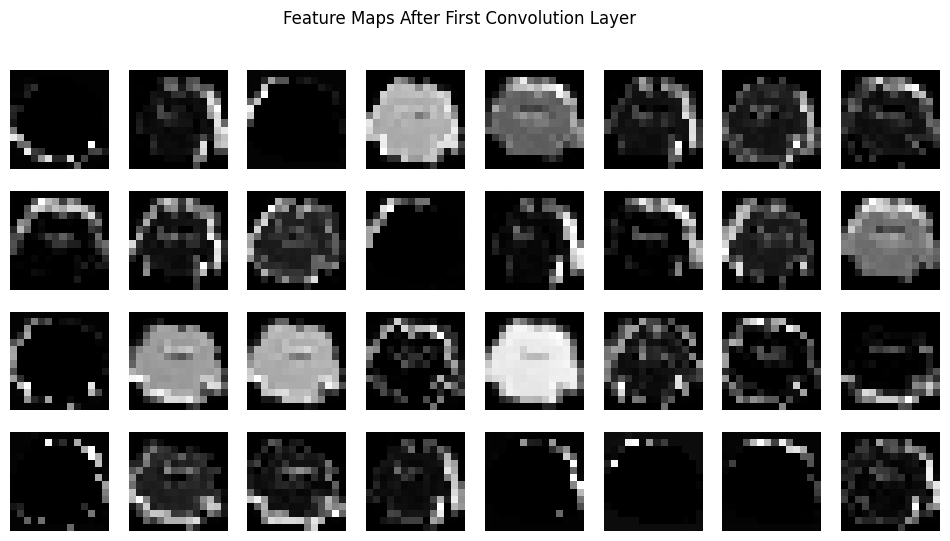

In [ ]:
# Show filters of the first Conv2d layer
conv1_weights = improved_model.conv_layers[0].weight.data.cpu()
fig, axes = plt.subplots(4, 8, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < 32:  # The layer has 32 filters
        ax.imshow(conv1_weights[i, 0].numpy(), cmap='gray')
        ax.axis('off')

plt.suptitle('Filters of the First Convolutional Layer')
plt.show()

# Example Feature Maps
example_image = train_dataset[0][0].unsqueeze(0).to(device) # Single sample image
feature_maps = improved_model.conv_layers[:4](example_image).squeeze(0).cpu() # Output up to the first MaxPool

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < 32:
        ax.imshow(feature_maps[i].detach().numpy(), cmap='gray')
        ax.axis('off')

plt.suptitle('Feature Maps After First Convolution Layer')
plt.show()

Accuracy on test set with improved model: 93.15%


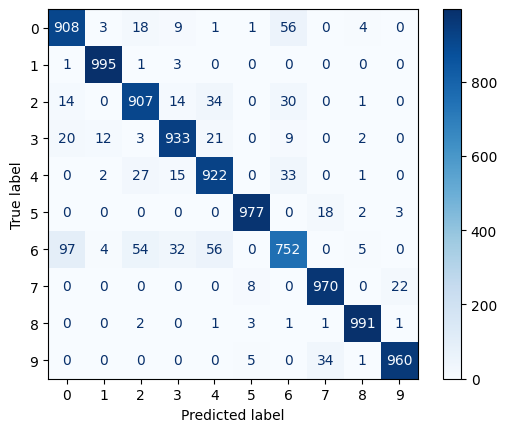

In [ ]:
# Evaluation of the improved model
improved_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = improved_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Improved model accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy on test set with improved model: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.show()

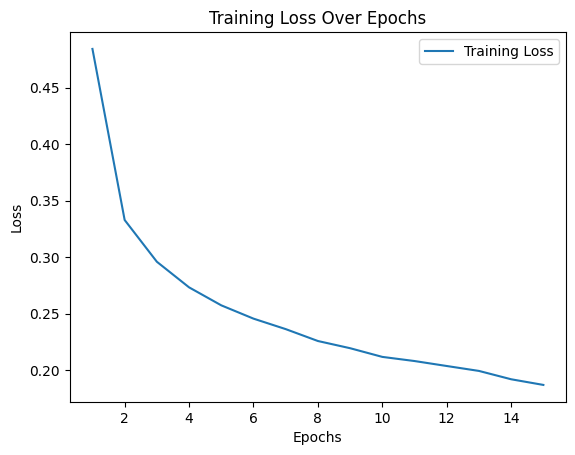

In [ ]:
# Training Loss Graph
plt.plot(range(1, improved_num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

<div dir="rtl">

דוח: שיפור המודל וביצועי  CNN

א. סיכום

במהלך הפרויקט פיתחתי שני מודלים של רשת נוירונים קונבולוציונית (CNN) לצורך סיווג תמונות. המודל הראשון כלל שתי שכבות קונבולוציה, בעוד שהמודל המשופר כלל שיפורים נוספים כמו שכבות קונבולוציה נוספות, Batch Normalization ,ושכבות Fully Connected מורחבות. שני המודלים אומנו על מערך נתונים של תמונות, ובסופו של תהליך בדקתי את ביצועיהם על מערך הבדיקות.

ב. ניתוח

ביצועי המודל

המודל הראשון, עם שתי שכבות קונבולוציה, הגיע לדיוק של 89.17%  על מערך הבדיקות לאחר 10 אפוקים (סבב מעבר על כל הנתונים ועדכון משקולות) . בעוד שהמודל המשופר, לאחר שיפורים במבנה, הראה שיפור משמעותי והגיע לדיוק של  93.15% לאחר 15 אפוקים.

השיפורים כללו:

•	 :Batch Normalization נוספה שכבת Batch Normalization לאחר כל שכבת קונבולוציה, על מנת לייצב את האימון ולמנוע אובדן מידע בין השכבות.

•	שכבת קונבולוציה נוספת : הוספת שכבת קונבולוציה עם 128 פילטרים לשיפור היכולת ללכוד תכונות מסובכות יותר בתמונות.

•	שכבות Fully Connected גדולות יותר : הגדלת שכבות ה-Fully Connected והוספת שכבה חדשה שתרמה לשיפור ביצועים על ידי יצירת יכולת למידה יותר רחבה.
אתגרים ופתרונות

במהלך האימון נתקלתי בכמה אתגרים:

1.	Overfitting  : המודל הראשון סבל ממידה מסוימת של התאמת יתר (overfitting) עקב מספר שכבות נמוך מדי. זה תוקן על ידי הוספת שכבות Batch Normalization ו-Dropout במודל המשופר.

2.	איטיות באימון: האימון במודל המשופר היה איטי יותר, בעיקר בגלל תוספת שכבות הקונבולוציה והאופטימיזציה (קצב למידה קטן יותר). עם זאת, השיפור בביצועים היה שווה את המחיר.

פרשנות של הוויזואליזציות

באמצעות ויזואליזציה של הפילטרים והמפות תכונות (feature maps), נצפתה הבדל ברור בין המודל הראשון למשופר. במודל המשופר, לאחר השכבות הקונבולוציוניות הנוספות, הפילטרים היו מסוגלים לזהות תכונות יותר מורכבות כמו צורות ודפוסים משוכללים יותר. מפות התכונות הפגינו מבנה מדויק יותר, עם פחות רעש, דבר המעיד על כך שהמודל למד לבצע סיווג יותר מדויק ומובחן.

סיכום

המודל המשופר הראה ביצועים גבוהים יותר מהמודל הבסיסי, עם שיפור משמעותי בדיוק הסיווג. השיפורים במודל המשופר, כולל הוספת שכבות קונבולוציה,  Batch Normalization , ושכבות Fully Connected גדולות יותר, תרמו לשיפור ביצועי המודל ושיפור יכולת הלמידה של הרשת.
</div>



<div dir="rtl">

Report: Model Improvement and CNN Performance

A. Summary

During the project, I developed two Convolutional Neural Network (CNN) models for image classification. The first model included two convolutional layers, while the improved model included additional improvements such as additional convolutional layers, Batch Normalization, and extended Fully Connected layers. Both models were trained on a dataset of images, and at the end of the process I tested their performance on the test dataset.

B. Analysis

Model Performance

The first model, with two convolutional layers, reached an accuracy of 89.17% on the test dataset after 10 epochs (a round of passing over all the data and updating weights). While the improved model, after improvements in the structure, showed a significant improvement and reached an accuracy of 93.15% after 15 epochs.

The improvements included:

• Batch Normalization: A Batch Normalization layer was added after each convolution layer, in order to stabilize the training and prevent information loss between layers.

• Additional convolution layer: Adding a convolution layer with 128 filters to improve the ability to capture more complicated features in images.

• Larger Fully Connected Layers: Increasing the Fully Connected layers and adding a new layer that contributed to improved performance by creating a broader learning capacity.

Challenges and Solutions

During training, I encountered several challenges:

1. Overfitting: The first model suffered from a certain degree of overfitting due to too few layers. This was fixed by adding Batch Normalization and Dropout layers in the improved model.

2. Slow training: Training in the improved model was slower, mainly due to the addition of convolution and optimization layers (smaller learning rate). However, the performance improvement was worth the price.

Interpretation of the visualizations

By visualizing the filters and feature maps, a clear difference was observed between the first and improved models. In the improved model, after the additional convolutional layers, the filters were able to identify more complex features such as more sophisticated shapes and patterns. The feature maps exhibited a more precise structure, with less noise, indicating that the model learned to perform more accurate and distinct classification.

Summary

The improved model showed higher performance than the baseline model, with a significant improvement in classification accuracy. The improvements in the improved model, including the addition of convolutional layers, Batch Normalization, and larger Fully Connected layers, contributed to the improvement of the model's performance and the improvement of the network's learning ability.
</div>